# Carbon Dioxide Emissions Prediction Model

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import linspace

## Linear Regression Implementation using Batch Gradient Descent
This class defines a linear regression model that acceps the learning rate and the epochs (number of iterations for the batch gradient descent) as hyperparameters. There are essentailly two functions:
- `fit(X, Y)`: takes the features and the corresponding value to train the model
- `predict(X)`: takes a list of features and returns the model's predicted values


In [2]:
class LinearRegression:
    def __init__(self, lr=0.001, epochs=1000):
        self.learning_rate = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None


    def fit(self, X, Y):
        sample_count, feature_count = len(X), len(X[0])
        self.weights = [0] * feature_count
        self.bias = 0

        for _ in range(self.epochs):
            y_preds = [self.bias] * sample_count
            for i in range(sample_count):
                for fi in range(feature_count):
                    y_preds[i] += X[i][fi] * self.weights[fi]
            
            y_diff = [y_preds[i] - Y[i] for i in range(len(Y))]
            bias_diff = (2/sample_count) * sum(y_diff)

            weight_diff = [0] * feature_count
            for i in range(sample_count):
                for fi in range(feature_count):
                    weight_diff[fi] += 2*(X[i][fi] * y_diff[i])
            
            for fi in range(feature_count):
                weight_diff[fi] *= 1/sample_count
            
            self.bias -= self.learning_rate * bias_diff
            for fi in range(len(self.weights)):
                self.weights[fi] -= self.learning_rate * weight_diff[fi]
            

    def predict(self, X):
        res = [self.bias] * len(X)
        for i in range(len(X)):
            for fi in range(len(X[0])):
                res[i] += self.weights[fi] * X[i][fi]
        
        return res

#### Importing the data and dividing it into a training, testing and validation sets using a 60-20-20 split 

In [3]:
# Import the dataset and filter out unnecessary features
data = pd.read_csv("./data/CO2_Emissions.csv")

filtered_columns = [
    "Make",
    "Model",
    "Vehicle Class",
    "Transmission",
    "Fuel Type",
    "Cylinders"
]

data_x = data.drop(columns=['CO2 Emissions(g/km)', *filtered_columns])
data_y = data['CO2 Emissions(g/km)']

train_x, temp_x, train_y, temp_y = train_test_split(data_x, data_y, test_size=0.40, random_state=42)
validation_x, test_x, validation_y, test_y = train_test_split(temp_x, temp_y, test_size=0.50, random_state=42)

## Showing that the conditions for Linear Regression are met
The following are the conditions that determine whether linear regression is an appropriate model for a given problem:

- ***Linear relationship***: states that there should be a linear relationship between the dependent and independent variables. This shall be demonstrated for each of the features in our dataset.

- ***Homoscedasticity***: states that the variance of residuals should be consistent across all levels of the independent variables. This can also be demonstrated with the aforementioned graphs.

- ***No Multicollinearity***: states that independent variables must not be too highly correlated with each other.

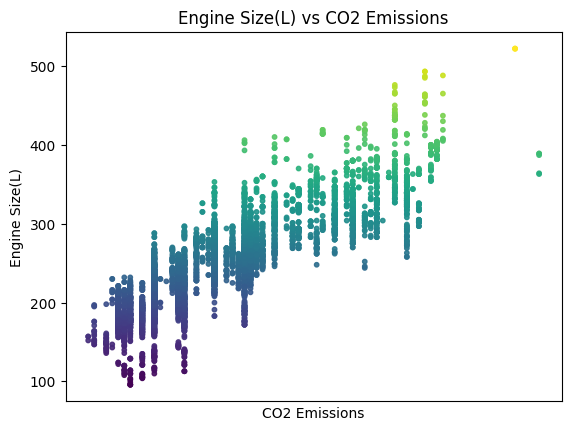

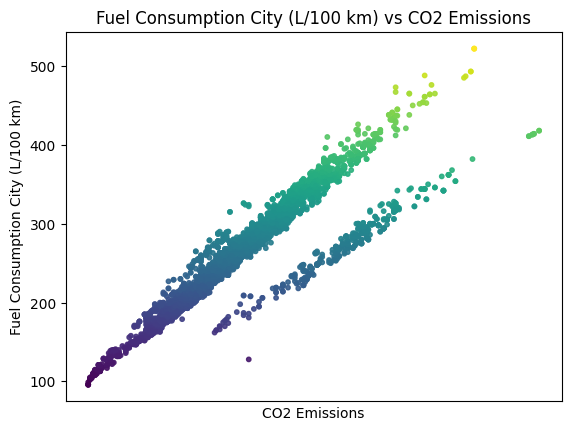

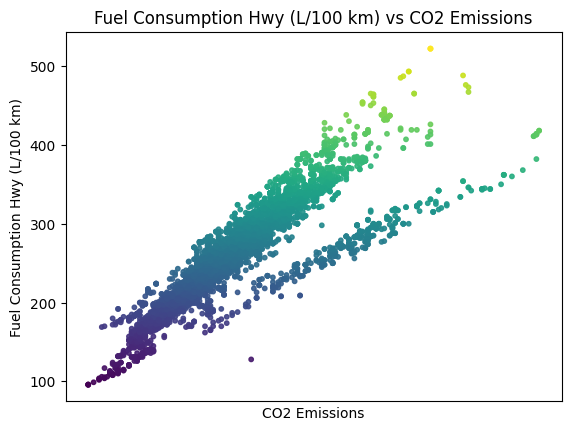

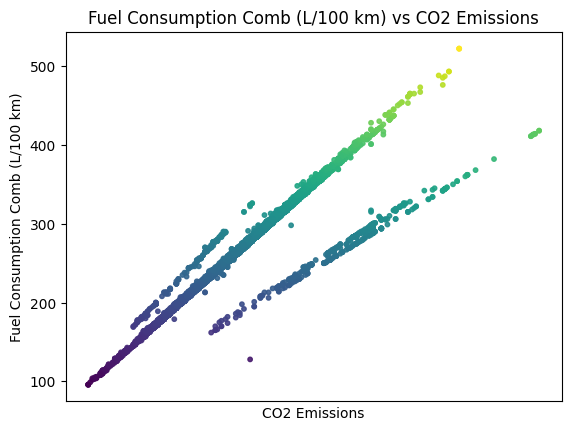

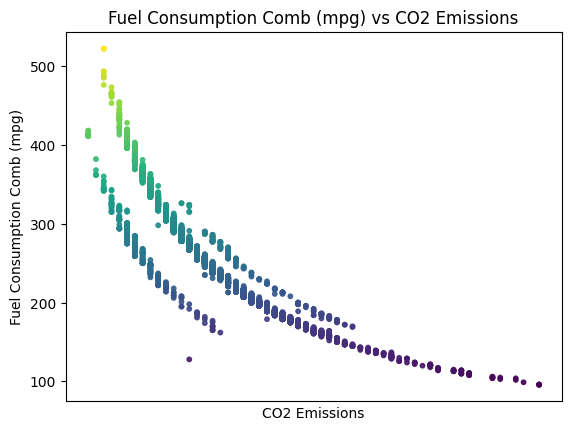

In [4]:
for feature in data_x.columns:
    plt.scatter(data_x[feature], data_y, s=10, c=data_y, cmap="viridis", alpha=0.9)
    plt.title(f'{feature} vs CO2 Emissions')
    plt.xlabel("CO2 Emissions")
    plt.ylabel(feature)
    plt.xticks([])
    plt.show()

## Training the model and tuning the hyperparameters

The learning rate will be tweaked to find a good middleground among all the hyperparameters. The validation data subset will be used to establish the best pair of hyperparameters for this particular model.

In [5]:
# Make several models using different learning rates and epochs and use the performance metric measures to check how well they perform
learning_rates = [0.00001, 0.0003, 0.0002, 0.0005, 0.0001]
models = [LinearRegression(lr=lr) for lr in learning_rates]

conv_train_x = train_x.values.tolist()
conv_train_y = list(train_y)

# Visualize features of the training data subset
train_x

,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
5170,2.0,11.5,9.8,10.7,26
1779,3.5,12.3,8.5,10.6,27
4503,3.0,13.0,9.8,11.5,25
4588,1.8,4.8,5.5,5.1,55
1818,2.5,8.7,6.5,7.7,37
...,...,...,...,...,...
5191,2.0,10.3,7.4,9.0,31
5226,3.5,10.6,7.3,9.1,31
5390,3.5,11.7,8.8,10.4,27
860,2.5,9.5,7.4,8.6,33


In [6]:
# Visualize results of the training data subset
train_y

5170    251
1779    244
4503    270
4588    121
1818    177
       ... 
5191    210
5226    214
5390    242
860     198
7270    279
Name: CO2 Emissions(g/km), Length: 4431, dtype: int64

#### Train each model, run the test with the validation data subset and choose the best performing model

In [7]:
# Train each model
for model in models:
    model.fit(conv_train_x, conv_train_y)

In [8]:
# Run the tests for each model
def root_mean_squared(real_values, predicted_values) -> float:
    ms = 0
    for i in range(len(real_values)):
        ms += pow(real_values[i] - predicted_values[i], 2)
    
    ms /= len(real_values)
    return pow(ms, 0.5)

conv_validation_x = validation_x.values.tolist()
conv_validation_y = list(validation_y)

rms_scores = [0] * len(models)
for i, model in enumerate(models):
    print(f" | Running validation tests for model #{i+1}")
    rms_scores[i] = root_mean_squared(conv_validation_y, model.predict(conv_validation_x))
    print(f" | Model #{i+1} scored an RMS value of: {round(rms_scores[i], 2)}")

best_model_index = 0
for i in range(len(models)):
    if rms_scores[i] > rms_scores[best_model_index]:
        best_model_index = i

best_model = models[best_model_index]
print(f"\n | Model {best_model_index + 1} with a learning rate of {learning_rates[best_model_index]} has the best score.")

 | Running validation tests for model #1
 | Model #1 scored an RMS value of: 31.11
 | Running validation tests for model #2
 | Model #2 scored an RMS value of: 21.95
 | Running validation tests for model #3
 | Model #3 scored an RMS value of: 22.1
 | Running validation tests for model #4
 | Model #4 scored an RMS value of: 21.76
 | Running validation tests for model #5
 | Model #5 scored an RMS value of: 22.29

 | Model 1 with a learning rate of 1e-05 has the best score.


[np.float64(2.0649461669315388), np.float64(2.213359696207871), np.float64(2.361773225484203), np.float64(2.510186754760536), np.float64(2.6586002840368677), np.float64(2.8070138133132003), np.float64(2.955427342589532), np.float64(3.1038408718658648), np.float64(3.2522544011421965), np.float64(3.400667930418529), np.float64(3.549081459694862), np.float64(3.6974949889711937), np.float64(3.8459085182475263), np.float64(3.994322047523858), np.float64(4.14273557680019), np.float64(4.2911491060765234), np.float64(4.439562635352856), np.float64(4.587976164629188), np.float64(4.73638969390552), np.float64(4.884803223181852), np.float64(5.033216752458184), np.float64(5.181630281734518), np.float64(5.3300438110108495), np.float64(5.478457340287182), np.float64(5.626870869563514), np.float64(5.775284398839846), np.float64(5.923697928116178), np.float64(6.07211145739251), np.float64(6.220524986668843), np.float64(6.3689385159451755), np.float64(6.517352045221508), np.float64(6.66576557449784), n

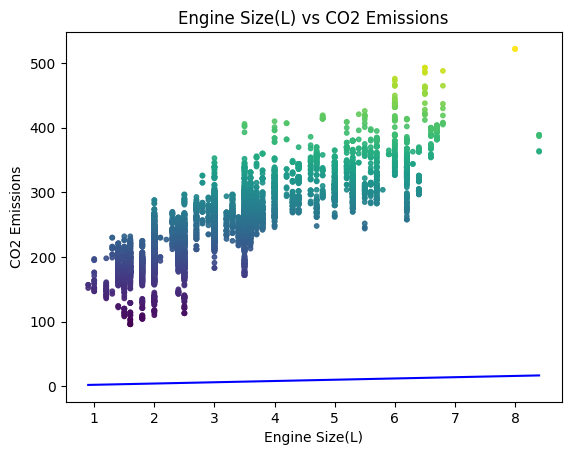

[np.float64(27.789873757862985), np.float64(29.535148698735004), np.float64(31.28042363960702), np.float64(33.02569858047903), np.float64(34.77097352135105), np.float64(36.51624846222307), np.float64(38.26152340309509), np.float64(40.0067983439671), np.float64(41.75207328483912), np.float64(43.497348225711136), np.float64(45.24262316658316), np.float64(46.987898107455166), np.float64(48.73317304832719), np.float64(50.47844798919921), np.float64(52.223722930071226), np.float64(53.968997870943234), np.float64(55.714272811815256), np.float64(57.45954775268728), np.float64(59.204822693559294), np.float64(60.9500976344313), np.float64(62.695372575303324), np.float64(64.44064751617536), np.float64(66.18592245704737), np.float64(67.93119739791938), np.float64(69.67647233879141), np.float64(71.42174727966342), np.float64(73.16702222053543), np.float64(74.91229716140745), np.float64(76.65757210227947), np.float64(78.4028470431515), np.float64(80.1481219840235), np.float64(81.89339692489551), np

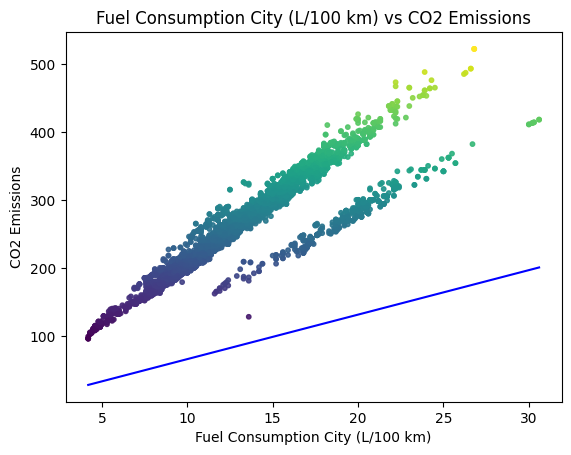

[np.float64(17.752816079883743), np.float64(18.484348847147718), np.float64(19.21588161441169), np.float64(19.947414381675664), np.float64(20.67894714893964), np.float64(21.41047991620361), np.float64(22.142012683467584), np.float64(22.873545450731562), np.float64(23.60507821799553), np.float64(24.336610985259508), np.float64(25.068143752523476), np.float64(25.799676519787454), np.float64(26.53120928705143), np.float64(27.262742054315403), np.float64(27.994274821579374), np.float64(28.72580758884335), np.float64(29.45734035610732), np.float64(30.188873123371295), np.float64(30.92040589063527), np.float64(31.65193865789924), np.float64(32.383471425163215), np.float64(33.115004192427186), np.float64(33.846536959691164), np.float64(34.578069726955135), np.float64(35.30960249421911), np.float64(36.041135261483085), np.float64(36.772668028747056), np.float64(37.50420079601103), np.float64(38.235733563275005), np.float64(38.96726633053898), np.float64(39.69879909780295), np.float64(40.430331

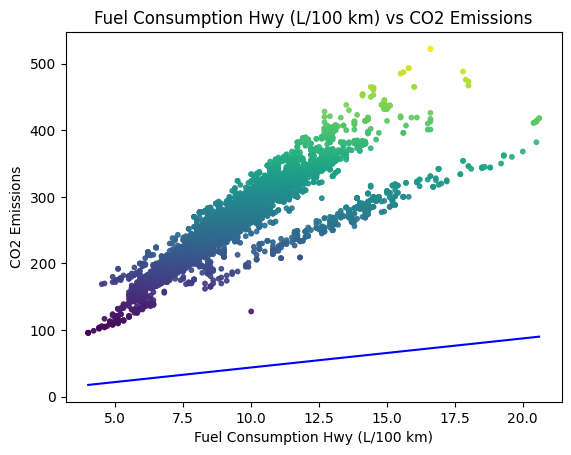

[np.float64(23.111408777921504), np.float64(24.347702292219218), np.float64(25.58399580651693), np.float64(26.820289320814645), np.float64(28.056582835112355), np.float64(29.292876349410065), np.float64(30.52916986370778), np.float64(31.76546337800549), np.float64(33.0017568923032), np.float64(34.23805040660091), np.float64(35.474343920898626), np.float64(36.71063743519634), np.float64(37.946930949494046), np.float64(39.18322446379177), np.float64(40.41951797808947), np.float64(41.65581149238719), np.float64(42.8921050066849), np.float64(44.128398520982614), np.float64(45.36469203528033), np.float64(46.60098554957804), np.float64(47.83727906387575), np.float64(49.07357257817346), np.float64(50.30986609247117), np.float64(51.54615960676888), np.float64(52.7824531210666), np.float64(54.01874663536431), np.float64(55.255040149662015), np.float64(56.491333663959736), np.float64(57.72762717825744), np.float64(58.96392069255516), np.float64(60.20021420685287), np.float64(61.436507721150576),

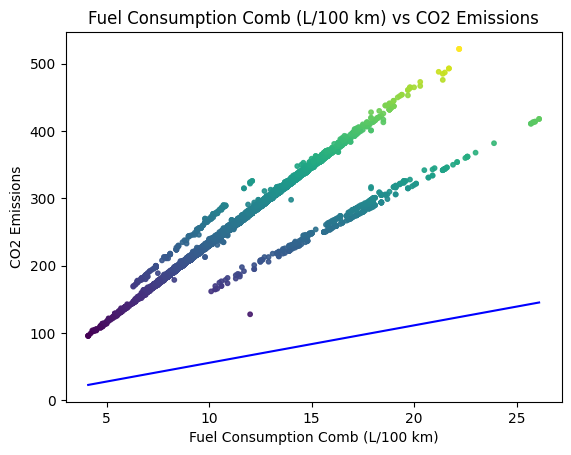

[np.float64(24.079278504042403), np.float64(25.3456643018064), np.float64(26.6120500995704), np.float64(27.8784358973344), np.float64(29.144821695098393), np.float64(30.411207492862395), np.float64(31.677593290626394), np.float64(32.943979088390385), np.float64(34.21036488615439), np.float64(35.47675068391838), np.float64(36.743136481682384), np.float64(38.00952227944638), np.float64(39.27590807721038), np.float64(40.542293874974376), np.float64(41.80867967273837), np.float64(43.07506547050237), np.float64(44.34145126826637), np.float64(45.60783706603037), np.float64(46.87422286379437), np.float64(48.14060866155837), np.float64(49.40699445932236), np.float64(50.673380257086365), np.float64(51.93976605485036), np.float64(53.20615185261436), np.float64(54.472537650378364), np.float64(55.73892344814236), np.float64(57.00530924590635), np.float64(58.271695043670356), np.float64(59.53808084143435), np.float64(60.804466639198345), np.float64(62.07085243696235), np.float64(63.33723823472635),

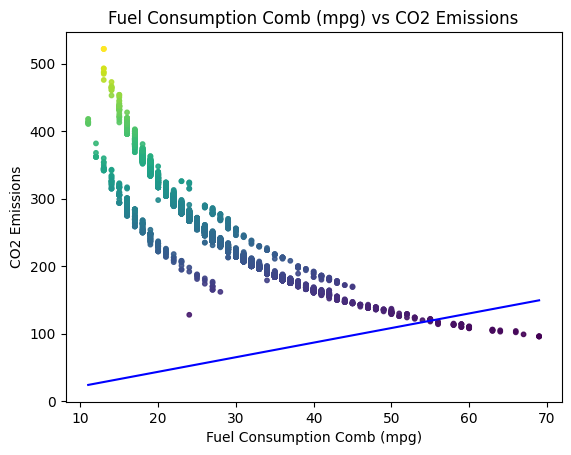

In [9]:
# plot the points with the regression line

for i, feature in enumerate(data_x.columns):
    plt.scatter(data_x[feature], data_y, s=10, c=data_y, cmap="viridis", alpha=0.9)
    
    line_x = linspace(min(data_x[feature]), max(data_x[feature]), 100)
    line_y = [[0] * len(data_x.columns) for _ in range(len(line_x))]
    for j, data_point in enumerate(line_y):
        data_point[i] = line_x[j]

    line_y = best_model.predict(line_y)
    print(line_y)
    plt.plot(line_x, line_y, color="blue")
    plt.title(f'{feature} vs CO2 Emissions')
    plt.xlabel(feature)
    plt.ylabel("CO2 Emissions")
    plt.show()

# Testing the Model

The testing data subset will be used along with the following performance metrics to evaluate the final version of the model:


### Defining functions for calculating the performance metrics